In [1]:
import torch

from model.network import ConvEncoder, ConvDecoder

img_size = 128

enc = ConvEncoder(img_size, 64).to('cuda')
dec = ConvDecoder(img_size, 64).to('cuda')

In [2]:
x = torch.randn(5, 3, img_size, img_size, device='cuda')
y = enc(x)
y.shape

torch.Size([5, 64])

In [3]:
xhat = dec(y)
xhat

Independent(Normal(loc: torch.Size([5, 3, 128, 128]), scale: torch.Size([5, 3, 128, 128])), 3)

In [4]:
xhat.batch_shape

torch.Size([5])

In [5]:
xhat.event_shape

torch.Size([3, 128, 128])

In [14]:
import gymnasium as gym
from gymnasium.wrappers import AddRenderObservation
import gymnasium_robotics


gym.register_envs(gymnasium_robotics)

example_map = [[1, 1, 1, 1, 1],
       [1, 'C', 0, 'C', 1],
       [1, 1, 1, 1, 1]]

# env = gym.make('AntMaze_UMaze-v5', render_mode='rgb_array')
env = gym.make('FrankaKitchen-v1', render_mode='rgb_array', width=128, height=128)
env = AddRenderObservation(env)

In [ ]:
from gymnasium import Env
from gymnasium_robotics.envs.franka_kitchen.kitchen_env import KitchenEnv
import matplotlib.pyplot as plt
import numpy as np

env = KitchenEnv(render_mode='rgb_array', width=128, height=128, default_camera_config=dict(
        distance=1.86, lookat=[-0.3, .5, 2.], azimuth=90, elevation=-60))

env.reset()
plt.imshow(env.render())
plt.show()

TypeError: MujocoEnv.__init__() got an unexpected keyword argument 'max_episode_steps'

In [100]:
obs, reward, truncatred, terminated, info = env.step(np.zeros(9))

In [102]:
obs

{'observation': array([ 1.48645940e-01, -1.76392265e+00,  1.87076733e+00, -2.46797332e+00,
         2.61919509e-01,  7.13303393e-01,  1.59631408e+00,  3.77126471e-02,
         3.76862018e-02, -2.77385160e-03, -7.40333907e-05,  1.26522147e-01,
         4.08798102e-02,  2.10238043e-03,  6.07186764e-03, -1.48828455e-03,
        -1.00054342e-02,  2.08591525e-04, -2.03512919e-04, -9.68412944e-08,
         2.45057013e-05,  1.76785222e-07,  1.83455075e-05,  3.32431310e-07,
         3.55884954e-05,  1.37513273e-07,  7.89303577e-05,  9.64876636e-06,
        -5.58652756e-05, -6.44008607e-03, -9.21165060e-05,  8.65766203e-05,
        -2.69387741e-01,  3.50371401e-01,  1.61937098e+00,  9.99999703e-01,
         3.55155240e-05, -1.47366496e-04, -2.68158749e-04,  2.80330932e-04,
         6.43353862e-06, -1.72336498e-05,  1.95299676e-06,  5.65130738e-05,
         5.38379583e-07, -9.66183818e-05, -3.00308590e-06, -7.52180041e-04,
        -3.26938107e-05,  7.68958477e-04,  3.87084405e-05,  1.91449041e-0

In [103]:
reward

0.0

In [104]:
terminated

False

In [105]:
truncatred

False

In [95]:
qpos = env.data.qpos.copy()
qvel = env.data.qvel.copy()
qpos

array([ 1.48388023e-01, -1.76848573e+00,  1.84390296e+00, -2.47685760e+00,
        2.60252026e-01,  7.12533105e-01,  1.59515394e+00,  4.79267505e-02,
        3.71350919e-02, -2.66279850e-04, -5.18043486e-05,  3.12877220e-05,
       -4.51199853e-05, -3.90842156e-06, -4.22629655e-05,  6.28065475e-05,
        4.04984708e-05,  4.62730939e-04, -2.26906415e-04, -4.65501369e-04,
       -6.44129196e-03, -1.77048263e-03,  1.08009684e-03, -2.69397440e-01,
        3.50383255e-01,  1.61944683e+00,  9.99970159e-01,  4.03883905e-03,
       -6.58004743e-03, -2.66621172e-04])

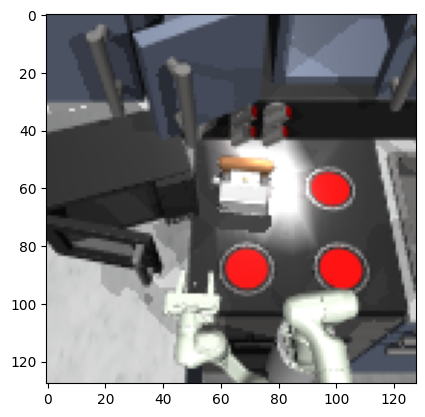

In [106]:
# bottom right
qpos[[9, 10]] = [-0.88, -0.01]
# bottom left
qpos[[11, 12]] = [-0.88, -0.01]
# top right
qpos[[13, 14]] = [-0.92, -0.01]
# top left
qpos[[15, 16]] = [-0.92, -0.01]
# light switch
qpos[[17, 18]] = [-0.69, -0.05]
# slide cabinet
qpos[19] = 0.37
# hinge cabinet
qpos[[20, 21]] = [0., 0.5]
# microwave
qpos[22] = -0.5
# kettle
qpos[[23, 24, 25, 26, 27, 28, 29]] = [-0.23, 0.75, 1.62, 0.99, 0., 0., -0.06]

env.robot_env.set_state(qpos, np.zeros_like(qvel))
plt.imshow(env.render())
plt.show()

In [3]:
img = env.render()

In [4]:
img.shape

(128, 128, 3)

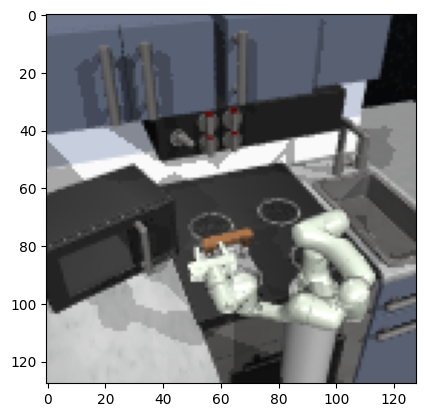

In [5]:
import matplotlib.pyplot as plt

plt.imshow(img)
plt.show()

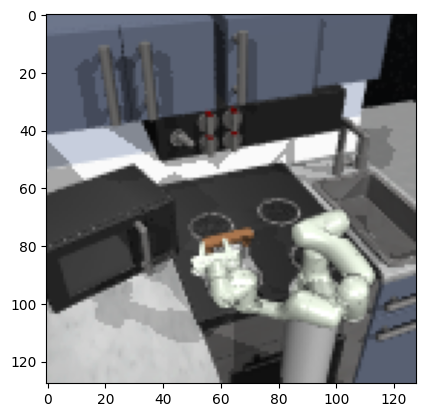

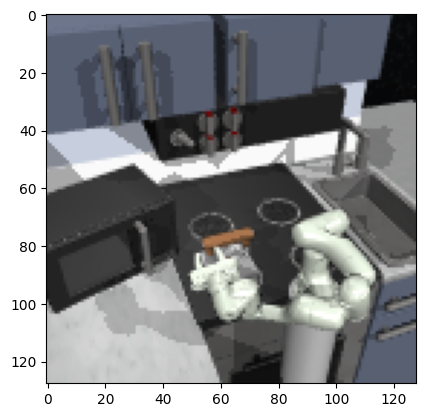

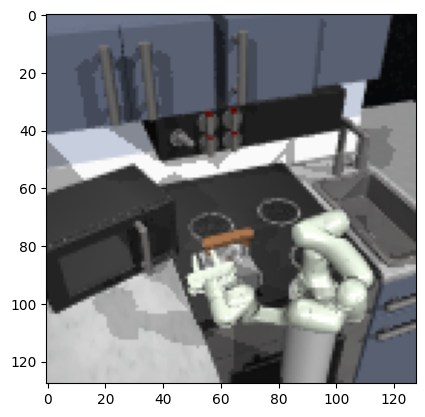

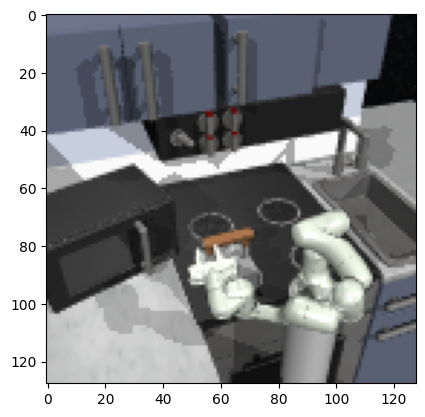

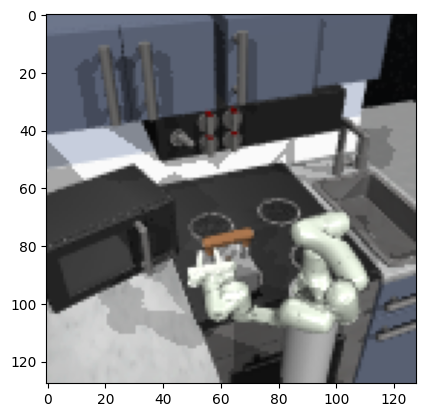

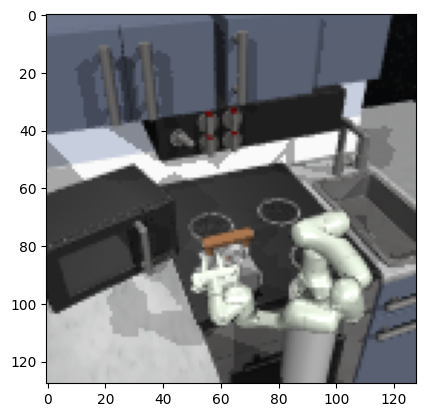

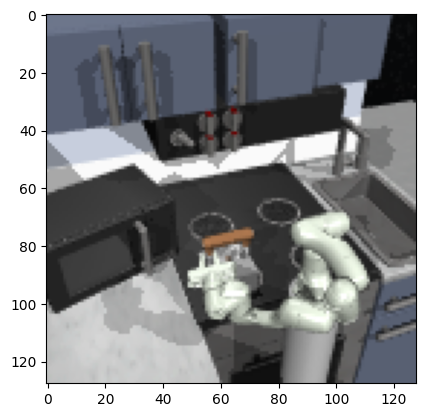

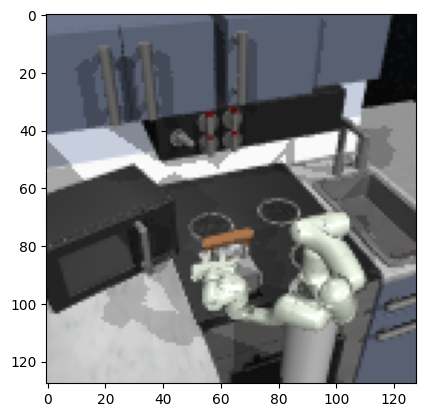

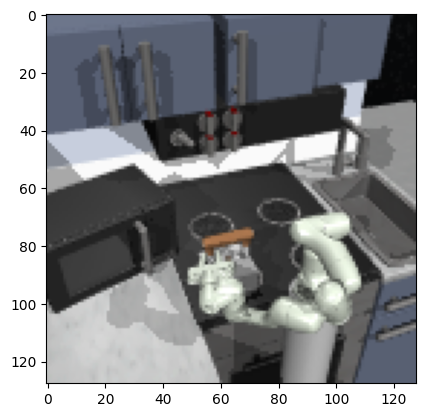

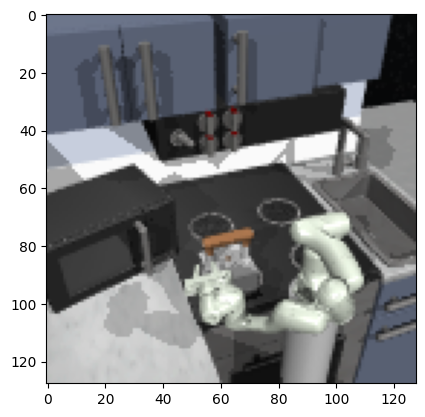

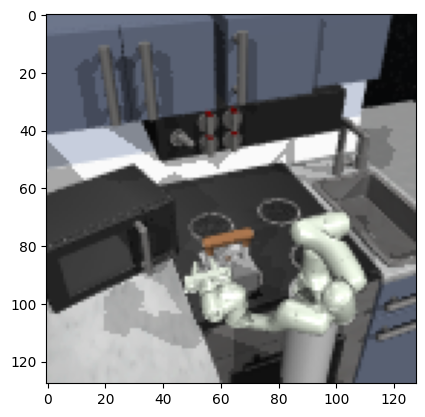

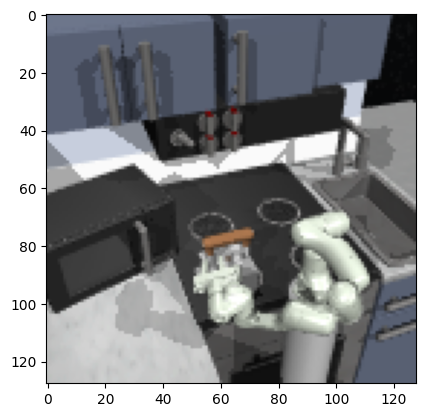

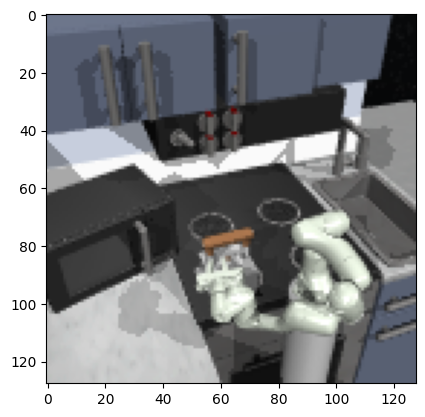

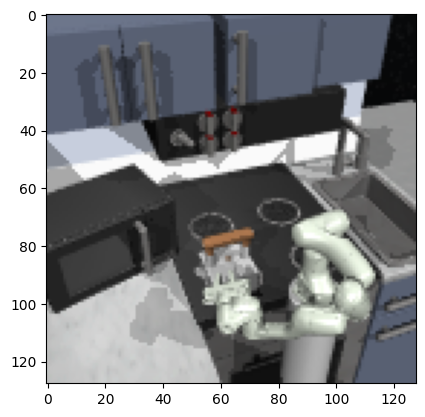

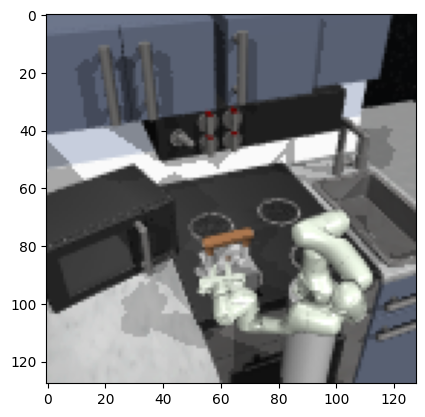

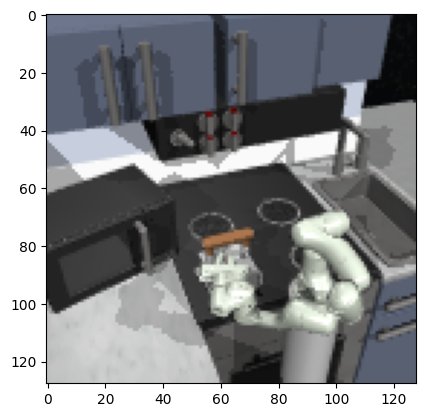

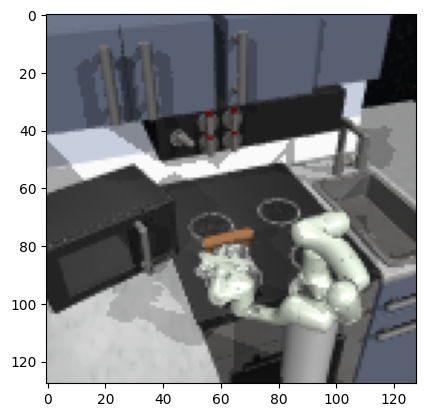

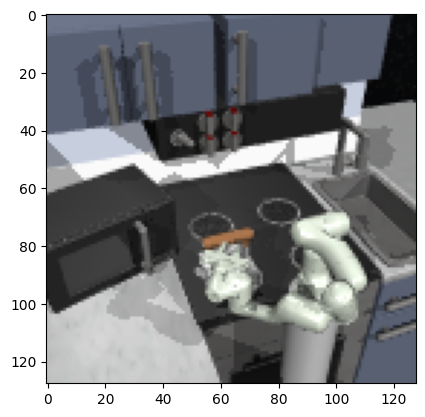

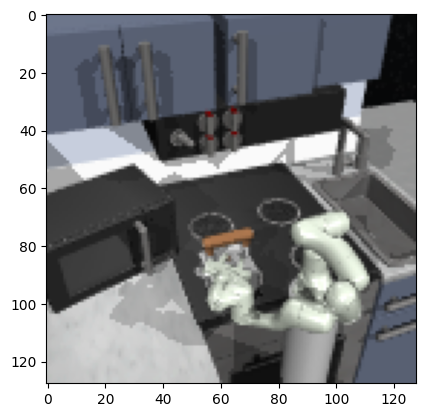

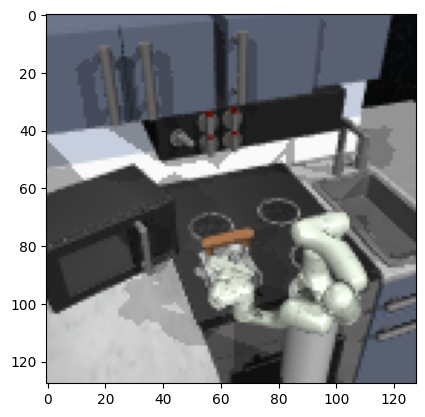

In [6]:
for t in range(20):
    action = env.action_space.sample()
    obs, reward, terminated, truncated, info = env.step(action)
    plt.imshow(obs)
    plt.show()

In [23]:
import numpy as np

def get_future_goal_idxs(seq_len, bs):
   
    cur_idx_list = []
    goal_idx_list = []
    #generate indices grid
    for cur_idx in range(seq_len):
      for goal_idx in range(cur_idx, seq_len):
        cur_idx_list.append(np.concatenate([np.ones((bs,1), dtype=np.int32)*cur_idx, np.arange(bs).reshape(-1,1)], axis = -1))
        goal_idx_list.append(np.concatenate([np.ones((bs,1), dtype=np.int32)*goal_idx, np.arange(bs).reshape(-1,1)], axis = -1))
    
    return np.concatenate(cur_idx_list,0), np.concatenate(goal_idx_list,0)

current_idxs, goal_idxs = get_future_goal_idxs(5, 3)

In [26]:
import torch

zs = torch.randn(5, 3, 2)
print(zs)
current_idx = current_idxs[[0,5,20]]
goal_idx = goal_idxs[[0,5,20]]
print(current_idx, goal_idx)
zs[current_idx[:,0], current_idx[:,1]]

tensor([[[ 0.3936, -0.8435],
         [ 1.4488,  0.2633],
         [-0.1234,  2.7075]],

        [[-0.3789,  2.0239],
         [ 0.6456,  0.0355],
         [ 0.4884,  1.2684]],

        [[-0.9154, -0.4571],
         [ 0.0717,  0.3633],
         [-1.2519, -0.9609]],

        [[ 0.1729,  0.3480],
         [ 1.3632, -2.5676],
         [ 2.3892, -0.1738]],

        [[-0.1489, -0.2791],
         [-0.9012,  2.8810],
         [ 0.0513,  0.7160]]])
[[0 0]
 [0 2]
 [1 2]] [[0 0]
 [1 2]
 [2 2]]


tensor([[ 0.3936, -0.8435],
        [-0.1234,  2.7075],
        [ 0.4884,  1.2684]])

In [27]:
goal_idx[:,0] - current_idx[:,0]

array([0, 1, 1])